Model: "advanced"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 vgg_head (Sequential)       (None, 193)               361665    
                                                                 
Total params: 20386049 (77.77 MB)
Trainable params: 361665 (1.38 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________
None
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                           

(<Figure size 1500x1500 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >]],
       dtype=object))

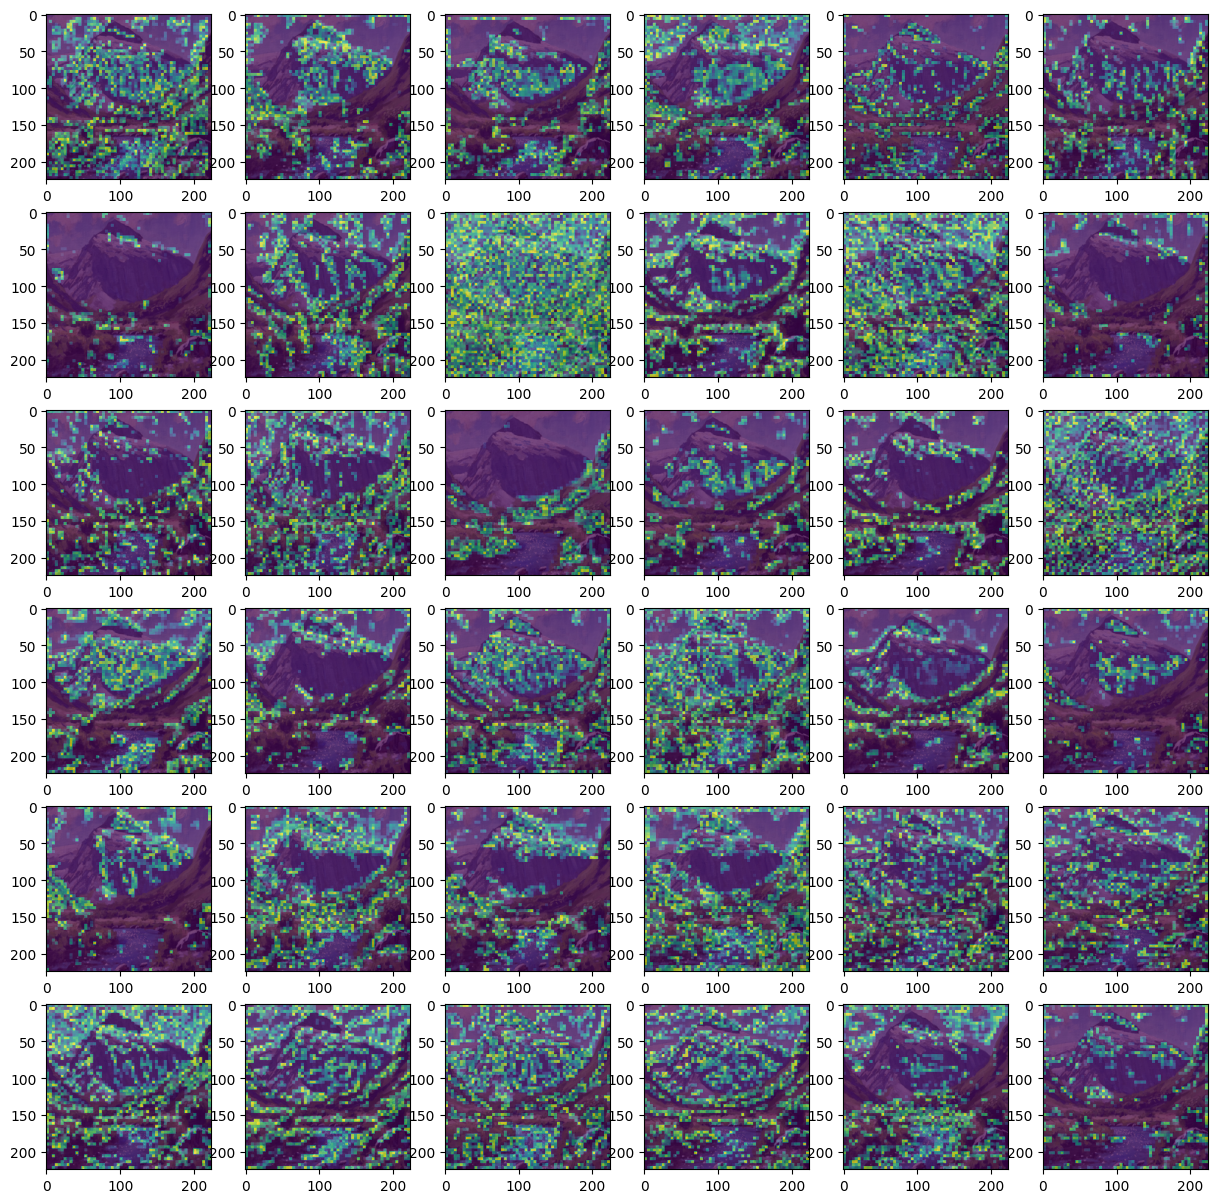

In [2]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import io

from tqdm import tqdm
import IPython.display

import skimage
import skimage.io
import numpy as np

import sys
sys.path.append('code')
import hyperparameters as hp
from models import Basic, Advanced

mpl.rcParams['figure.figsize'] = [8, 8]


# Load the Keras model - need to load in the loss fn as well
model = tf.keras.models.load_model('saved_models/my_model', custom_objects={'loss_fn': Basic.loss_fn})

print(model.summary())

# For the advanced model
print(model.vgg19.summary())
print(model.head.summary())

def visualize_cnn_layer(img, layer_name, nrows, ncols, figsize, view_img=True):
    img = img.resize((224,224))
    img = np.array(img)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    # LAYER_NAME IS NOT IN USE DUE TO HOW OUR MODEL IS STRUCTURED!!
    # Just edit it manually here :)))))))))         vvv

    curr_layer = model.get_layer('vgg19').get_layer('block3_conv1').output
    input_layer = model.get_layer('vgg19').input
    slice_model = tf.keras.Model(inputs=input_layer, outputs=curr_layer)
    slice_output = slice_model.predict(img[None,:,:,:])
    print(np.shape(slice_output))

    for row in range(nrows):
        for col in range(ncols):
            idx = row * ncols + col
            curr_ax = axes[row, col]
            out = slice_output[0,:,:,idx].astype(np.uint8)
            out = Image.fromarray(out)
            out = out.resize(img.shape[:-1], resample=Image.BOX)
            curr_ax.imshow(out)
            if view_img:
                curr_ax.imshow(img, alpha=0.3)

    return fig, axes


img_file = 'test_images/mountains.jpeg'
img2 = Image.open(img_file)
img2 = img2.crop((200, 200, img2.width - 200, img2.height - 200))

## Fill in layer name here, same one as model instantiated
visualize_cnn_layer(img2, 'vgg19', 6, 6, (15,15))
